In [1]:
# check the \sqrt \gamma factor present in the volume and surface integrals
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": False,
    "mathtext.fontset": 'cm',  # Computer Modern font - looks like LaTeX
    "font.family": 'STIXGeneral'
})
basedir = "/pscratch/sd/x/xinshuo/runGReX/"
plotdir = "/pscratch/sd/x/xinshuo/plotGReX/"

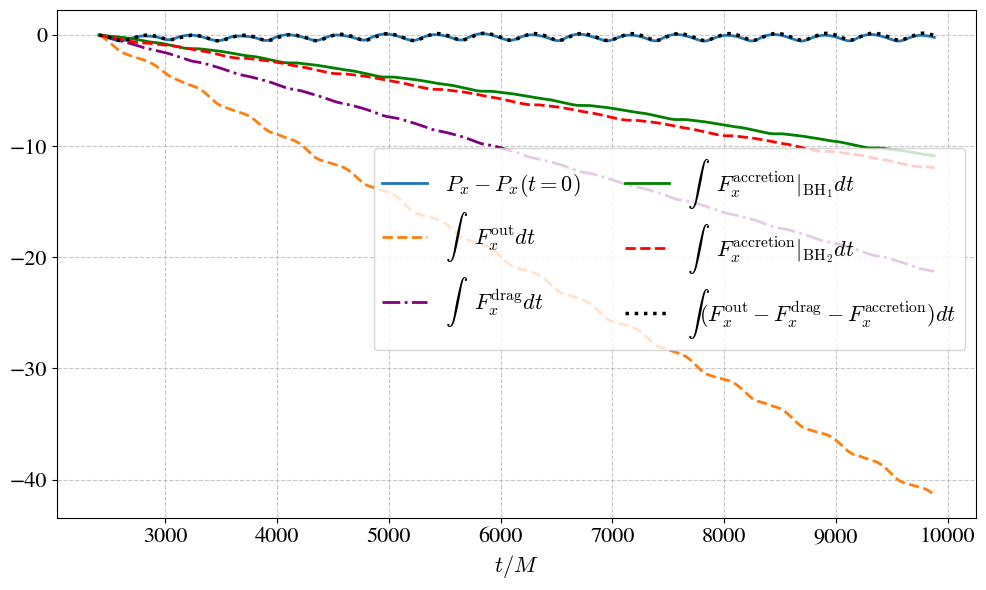

In [2]:
outR=156.6
excise_factor = 1.5


simname = '250528_BBH_r70_moreplots_restart'



rundir = basedir + simname +"/"

results = np.load(plotdir+f"{simname}_2d_integrals_outR{outR}_excise{excise_factor}_parallel.npy")
results_sur = np.load(plotdir+f"{simname}_2d_integrals_surface_outR{outR}_excise{excise_factor}_parallel.npy")


# remove the first 2 data points in results_sur and results
results = results[80:]
results_sur = results_sur[80:]


dt = results[1,0] - results[0,0]
dt_sur = results_sur[1,0] - results_sur[0,0]
cumulative_sum = np.cumsum(results[:,1])*dt - results[0,1]*dt
cumulative_sum_sur = np.cumsum(results_sur[:,1])*dt_sur - results_sur[0,1]*dt_sur
cumulative_sum_sur_bh1 = np.cumsum(results_sur[:,4])*dt_sur - results_sur[0,4]*dt_sur
cumulative_sum_sur_bh2 = np.cumsum(results_sur[:,7])*dt_sur - results_sur[0,7]*dt_sur
plt.rcParams.update({
    "text.usetex": False,
    "mathtext.fontset": 'cm',  # Computer Modern font - looks like LaTeX
    "font.family": 'STIXGeneral'
})
plt.figure(figsize=(10, 6))
fontsize = 16

# Define colors and line styles for better visual distinction
colors = ['#1f77b4', '#ff7f0e', 'purple', 'g', 'r', '#8c564b']
line_styles = ['-', '--', '-.', '-', '--', ':']
line_widths = [2, 2, 2, 2, 2, 2.5]

plt.plot(results[:,0], (results[:,4]-results[0,4]), 
         color=colors[0], linestyle=line_styles[0], linewidth=line_widths[0], 
         label=r'$P_x-P_x(t=0)$')
plt.plot(results[:,0], -cumulative_sum_sur, 
         color=colors[1], linestyle=line_styles[1], linewidth=line_widths[1], 
         label=r'$\int$   $F^{\mathrm{out}}_x dt$')
plt.plot(results_sur[:,0], cumulative_sum, 
         color=colors[2], linestyle=line_styles[2], linewidth=line_widths[2], 
         label=r'$\int$   $F^{\mathrm{drag}}_x dt$')
plt.plot(results_sur[:,0], -cumulative_sum_sur_bh1*0.5, 
         color=colors[3], linestyle=line_styles[3], linewidth=line_widths[3], 
         label=r'$\int$   $F^{\mathrm{accretion}}_x |_{\mathrm{BH_1}} dt$')
plt.plot(results_sur[:,0], -cumulative_sum_sur_bh2*0.5, 
         color=colors[4], linestyle=line_styles[4], linewidth=line_widths[4], 
         label=r'$\int$   $F^{\mathrm{accretion}}_x |_{\mathrm{BH_2}} dt$')
plt.plot(results_sur[:,0], -cumulative_sum_sur-cumulative_sum + (cumulative_sum_sur_bh1+cumulative_sum_sur_bh2)*0.44, 
         color='black', linestyle=line_styles[5], linewidth=line_widths[5], 
         label=r'$\int (F^{\mathrm{out}}_x-F^{\mathrm{drag}}_x-F^{\mathrm{accretion}}_x) dt$')

plt.xlabel('$t/M$', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=fontsize, loc='center right', bbox_to_anchor=(1.0, 0.53), ncol=2)
plt.tight_layout()





39.480276000071946
40.17475729232105
77.93460965209285
79.3055253068369
153.84399495112473
156.55020137223056
303.69016908120415
309.03225790212537


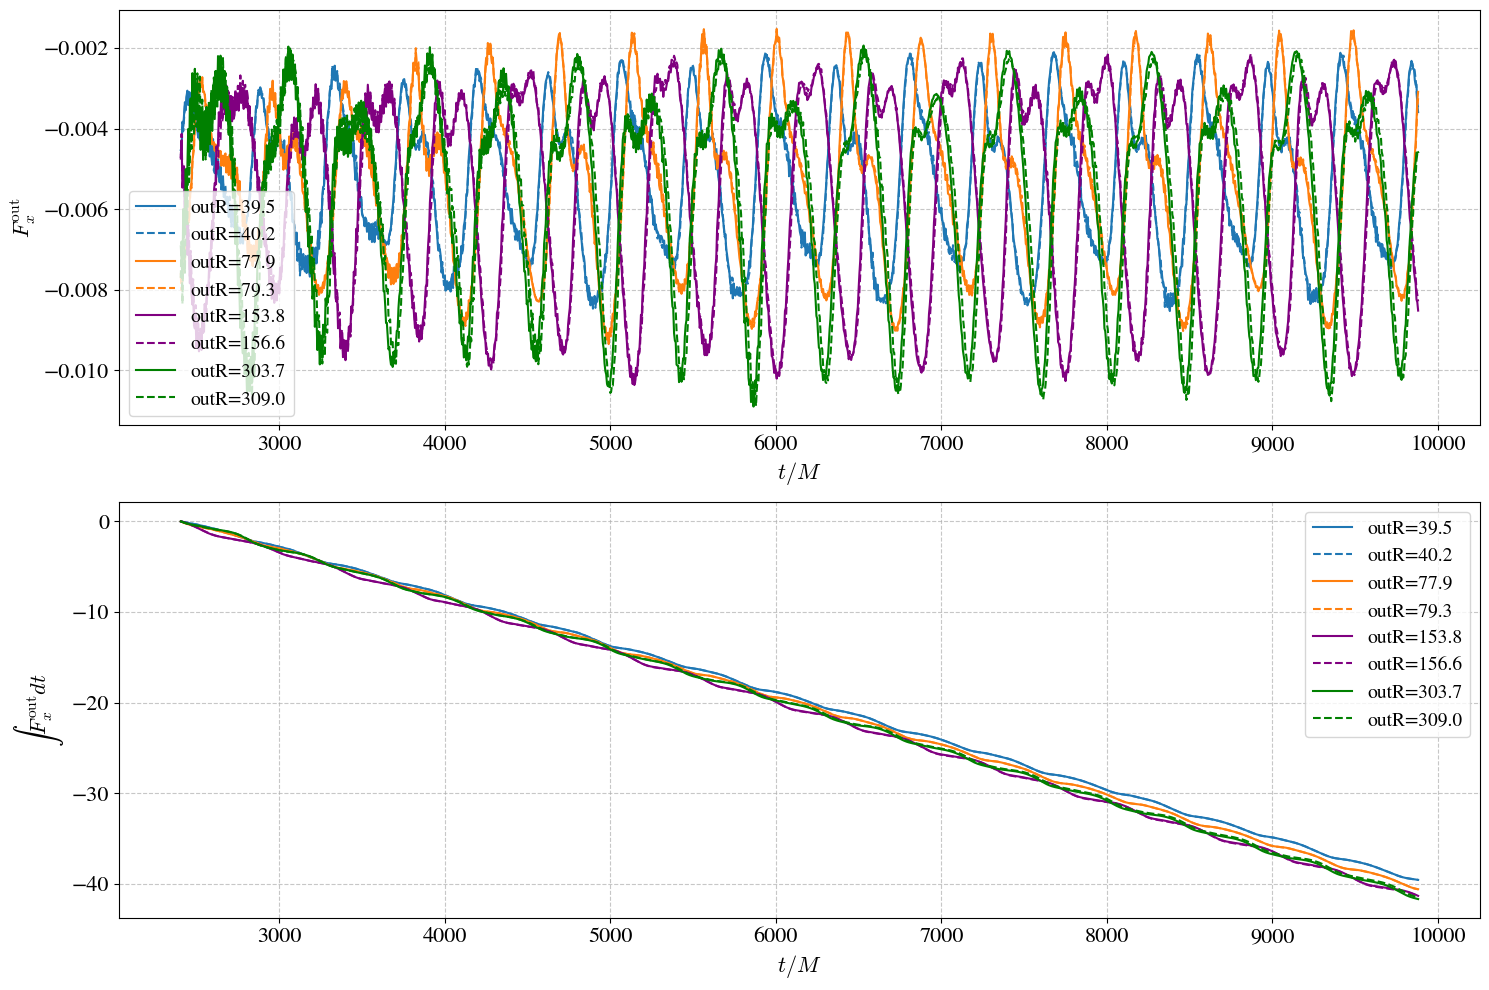

In [3]:
# plot F^out at different outR, they should not vary too much since the drag is not significant at large radii
# outRs = [44.8, 99.5, 159.3, 199.8, 250.3, 320.0]


all_outR_values = np.logspace(np.log10(20.0), np.log10(320.0), 160)
outRs = all_outR_values[[39, 40, 78, 79, 117, 118, 156, 157]]

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Define colors and line styles for better visual distinction
colors = ['#1f77b4', '#ff7f0e', 'purple', 'g']
line_styles = ['-', '--', '-', '--', '-', '--', '-', '--']

for i, outR in enumerate(outRs):
    print(outR)
    results_sur = np.load(plotdir+f"{simname}_2d_integrals_surface_outR{outR:.1f}_excise{excise_factor}_parallel.npy")
    results_sur = results_sur[80:]
    
    # Determine color index (same color for pairs)
    color_idx = i // 2
    # Determine line style (solid for even indices in pair, dashed for odd)
    style_idx = i % 2
    
    # Upper panel: Plot F^out directly
    ax1.plot(results_sur[:,0], -results_sur[:,1], 
             color=colors[color_idx], linestyle=line_styles[style_idx],
             label=f'outR={outR:.1f}')
    
    # Lower panel: Plot integrated F^out
    cumulative_sum_sur = np.cumsum(results_sur[:,1])*dt_sur - results_sur[0,1]*dt_sur
    ax2.plot(results_sur[:,0], -cumulative_sum_sur, 
             color=colors[color_idx], linestyle=line_styles[style_idx],
             label=f'outR={outR:.1f}')

# Configure upper subplot
ax1.set_xlabel('$t/M$', fontsize=fontsize)
ax1.set_ylabel('$F^{\mathrm{out}}_x$', fontsize=fontsize)
ax1.tick_params(labelsize=fontsize)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(fontsize=fontsize-2)

# Configure lower subplot
ax2.set_xlabel('$t/M$', fontsize=fontsize)
ax2.set_ylabel('$\int F^{\mathrm{out}}_x dt$', fontsize=fontsize)
ax2.tick_params(labelsize=fontsize)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(fontsize=fontsize-2)

plt.tight_layout()
plt.show()





39.480276000071946
40.17475729232105
77.93460965209285
79.3055253068369
153.84399495112473
156.55020137223056
303.69016908120415
309.03225790212537


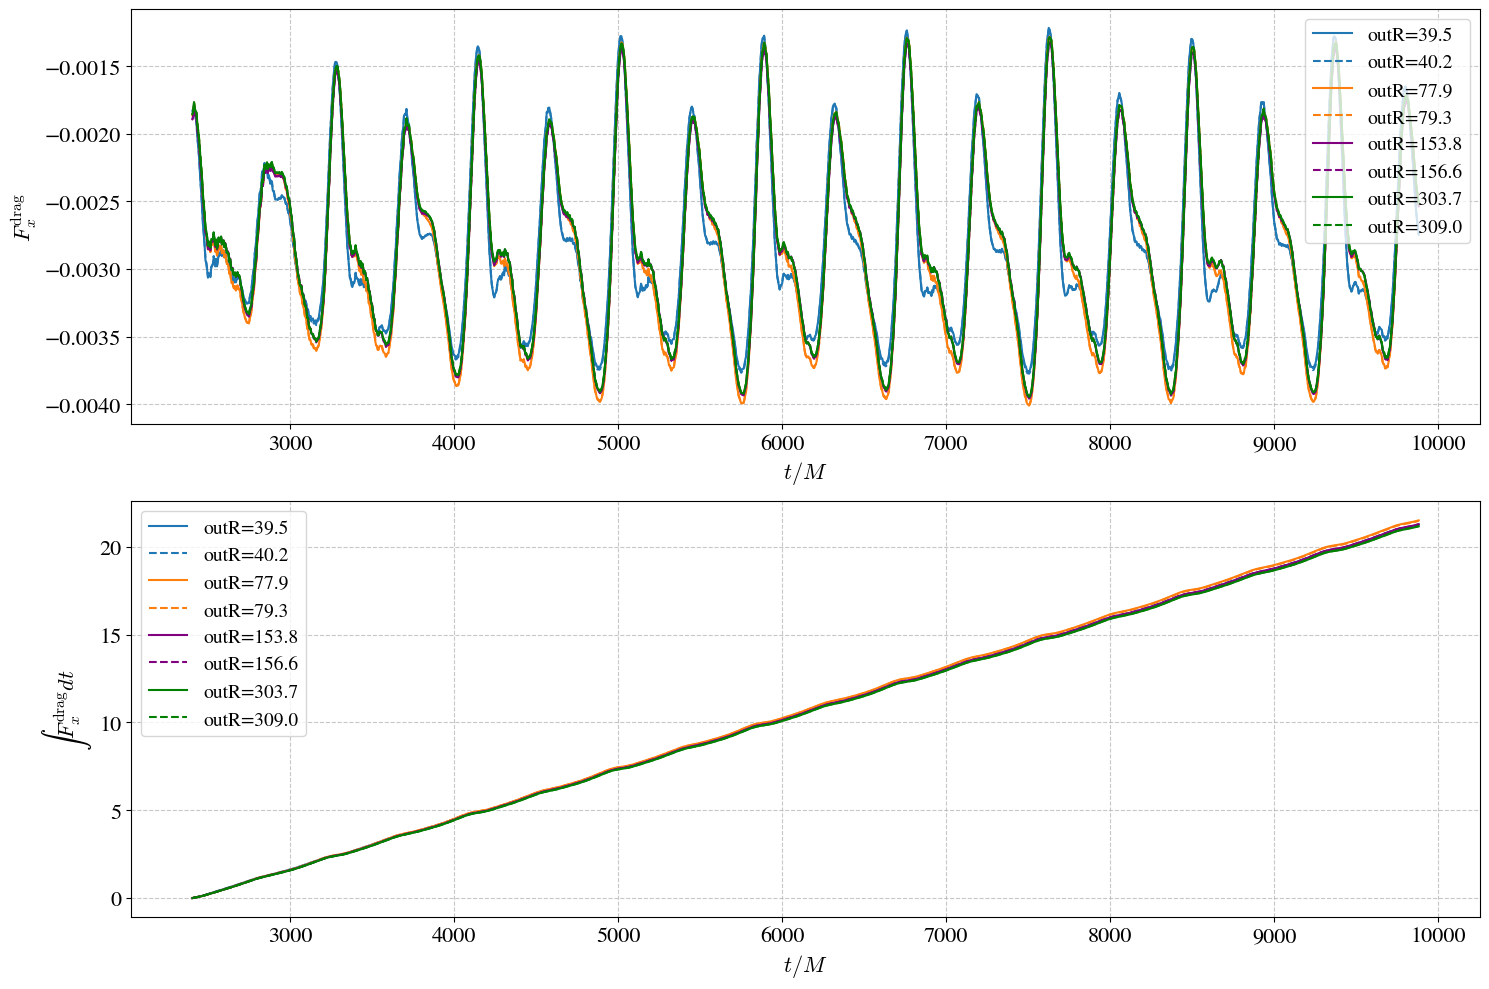

In [4]:

# plot F^out at different outR, they should not vary too much since the drag is not significant at large radii
# outRs = [44.8, 99.5, 159.3, 199.8, 250.3, 320.0]


all_outR_values = np.logspace(np.log10(20.0), np.log10(320.0), 160)
outRs = all_outR_values[[39, 40, 78, 79, 117, 118, 156, 157]]

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Define colors and line styles for better visual distinction
colors = ['#1f77b4', '#ff7f0e', 'purple', 'g']
line_styles = ['-', '--', '-', '--', '-', '--', '-', '--']

for i, outR in enumerate(outRs):
    print(outR)
    results = np.load(plotdir+f"{simname}_2d_integrals_outR{outR:.1f}_excise{excise_factor}_parallel.npy")
    results = results[80:]
    
    # Determine color index (same color for pairs)
    color_idx = i // 2
    # Determine line style (solid for even indices in pair, dashed for odd)
    style_idx = i % 2
    
    # Upper panel: Plot F^drag directly
    ax1.plot(results[:,0], results[:,1], 
             color=colors[color_idx], linestyle=line_styles[style_idx],
             label=f'outR={outR:.1f}')
    
    # Lower panel: Plot integrated F^drag
    cumulative_sum = np.cumsum(results[:,1])*dt - results[0,1]*dt
    ax2.plot(results[:,0], -cumulative_sum, 
             color=colors[color_idx], linestyle=line_styles[style_idx],
             label=f'outR={outR:.1f}')

# Configure upper subplot
ax1.set_xlabel('$t/M$', fontsize=fontsize)
ax1.set_ylabel('$F^{\mathrm{drag}}_x$', fontsize=fontsize)
ax1.tick_params(labelsize=fontsize)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(fontsize=fontsize-2)

# Configure lower subplot
ax2.set_xlabel('$t/M$', fontsize=fontsize)
ax2.set_ylabel('$\int F^{\mathrm{drag}}_x dt$', fontsize=fontsize)
ax2.tick_params(labelsize=fontsize)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(fontsize=fontsize-2)

plt.tight_layout()
plt.show()

# looks like Fdrag converges very well at large radii




39.480276000071946
40.17475729232105
77.93460965209285
79.3055253068369
153.84399495112473
156.55020137223056
303.69016908120415
309.03225790212537


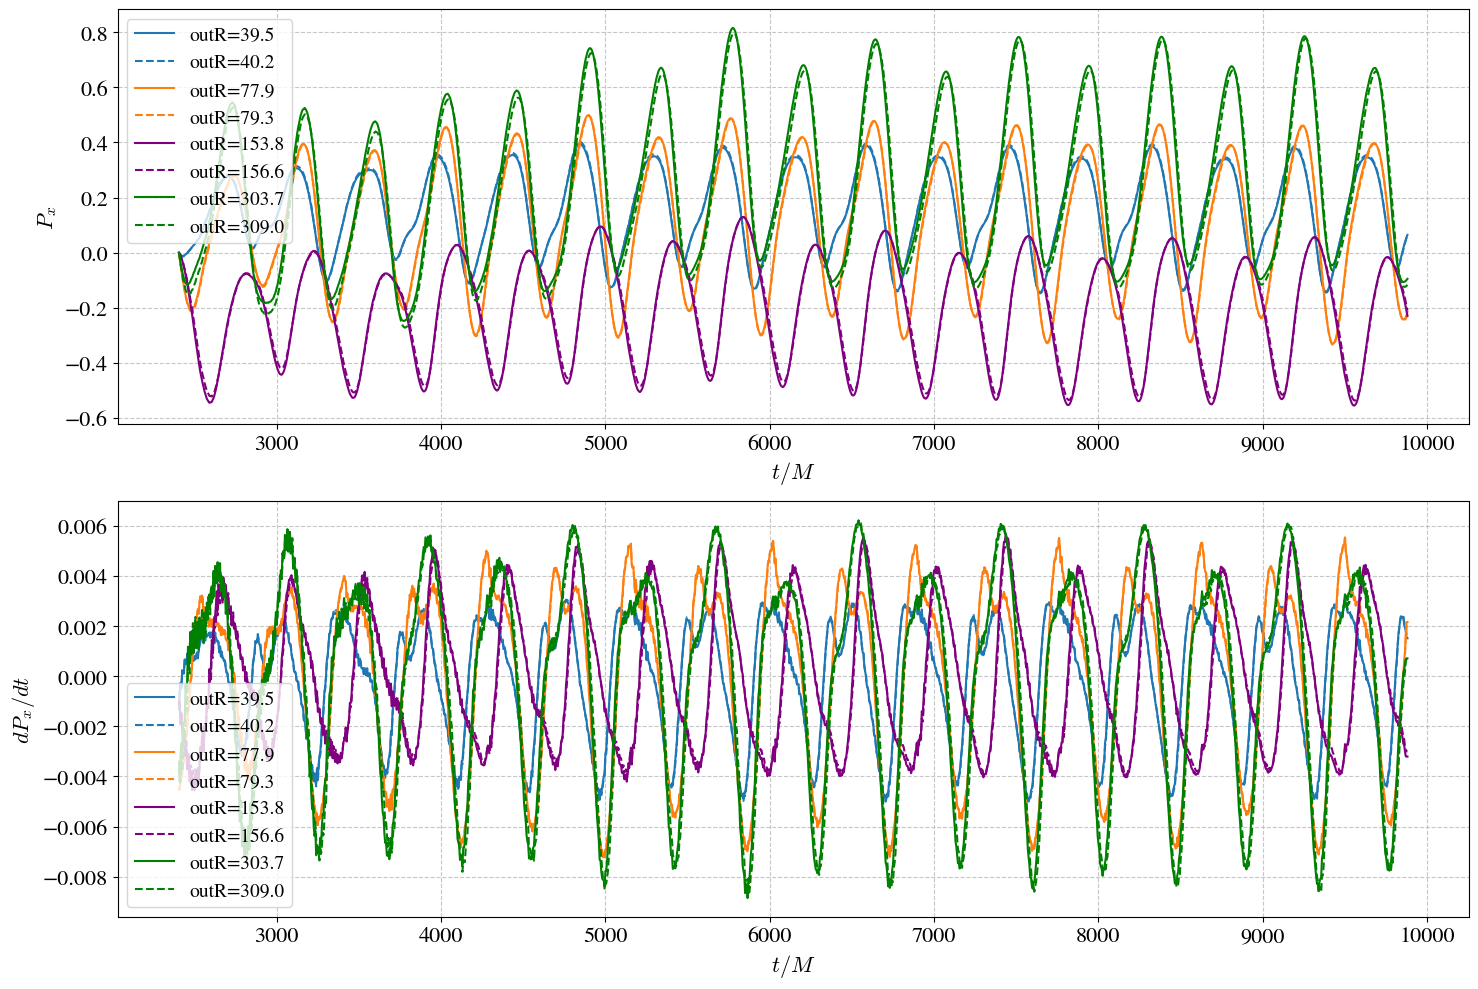

In [5]:
# plot the momentum and its derivative

all_outR_values = np.logspace(np.log10(20.0), np.log10(320.0), 160)
outRs = all_outR_values[[39, 40, 78, 79, 117, 118, 156, 157]]

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Define colors and line styles for better visual distinction
colors = ['#1f77b4', '#ff7f0e', 'purple', 'g']
line_styles = ['-', '--', '-', '--', '-', '--', '-', '--']

def extract_momentum_and_derivative(results):
    """
    Extract momentum and calculate its derivative.
    
    Args:
        results: numpy array containing simulation results
        
    Returns:
        momentum: Px - Px_initial
        derivative: dPx/dt with same shape as results
    """
    time = results[:,0]
    momentum = results[:,4] - results[0,4]
    
    # Compute dPx/dt using finite difference
    dt_values = np.diff(time)
    dPx = np.diff(results[:,4])
    dPx_dt = dPx / dt_values
    
    # Create derivative array with same shape as results
    # Use forward difference for the last point
    derivative = np.zeros_like(time)
    derivative[:-1] = dPx_dt
    # Set the last point to match the previous one (simple extrapolation)
    derivative[-1] = derivative[-2]
    
    return momentum, derivative

for i, outR in enumerate(outRs):
    print(outR)
    results = np.load(plotdir+f"{simname}_2d_integrals_outR{outR:.1f}_excise{excise_factor}_parallel.npy")
    results = results[80:]
    
    # Determine color index (same color for pairs)
    color_idx = i // 2
    # Determine line style (solid for even indices in pair, dashed for odd)
    style_idx = i % 2
    
    # Extract momentum and derivative
    momentum, derivative = extract_momentum_and_derivative(results)
    
    # Upper panel: Plot momentum Px
    ax1.plot(results[:,0], momentum, 
             color=colors[color_idx], linestyle=line_styles[style_idx],
             label=f'outR={outR:.1f}')
    
    # Lower panel: Plot dPx/dt
    ax2.plot(results[:,0], derivative, 
             color=colors[color_idx], linestyle=line_styles[style_idx],
             label=f'outR={outR:.1f}')

# Configure upper subplot
ax1.set_xlabel('$t/M$', fontsize=fontsize)
ax1.set_ylabel('$P_x$', fontsize=fontsize)
ax1.tick_params(labelsize=fontsize)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(fontsize=fontsize-2)

# Configure lower subplot
ax2.set_xlabel('$t/M$', fontsize=fontsize)
ax2.set_ylabel('$dP_x/dt$', fontsize=fontsize)
ax2.tick_params(labelsize=fontsize)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(fontsize=fontsize-2)

plt.tight_layout()
plt.show()

39.480276000071946
40.17475729232105
77.93460965209285
79.3055253068369
153.84399495112473
156.55020137223056
303.69016908120415
309.03225790212537


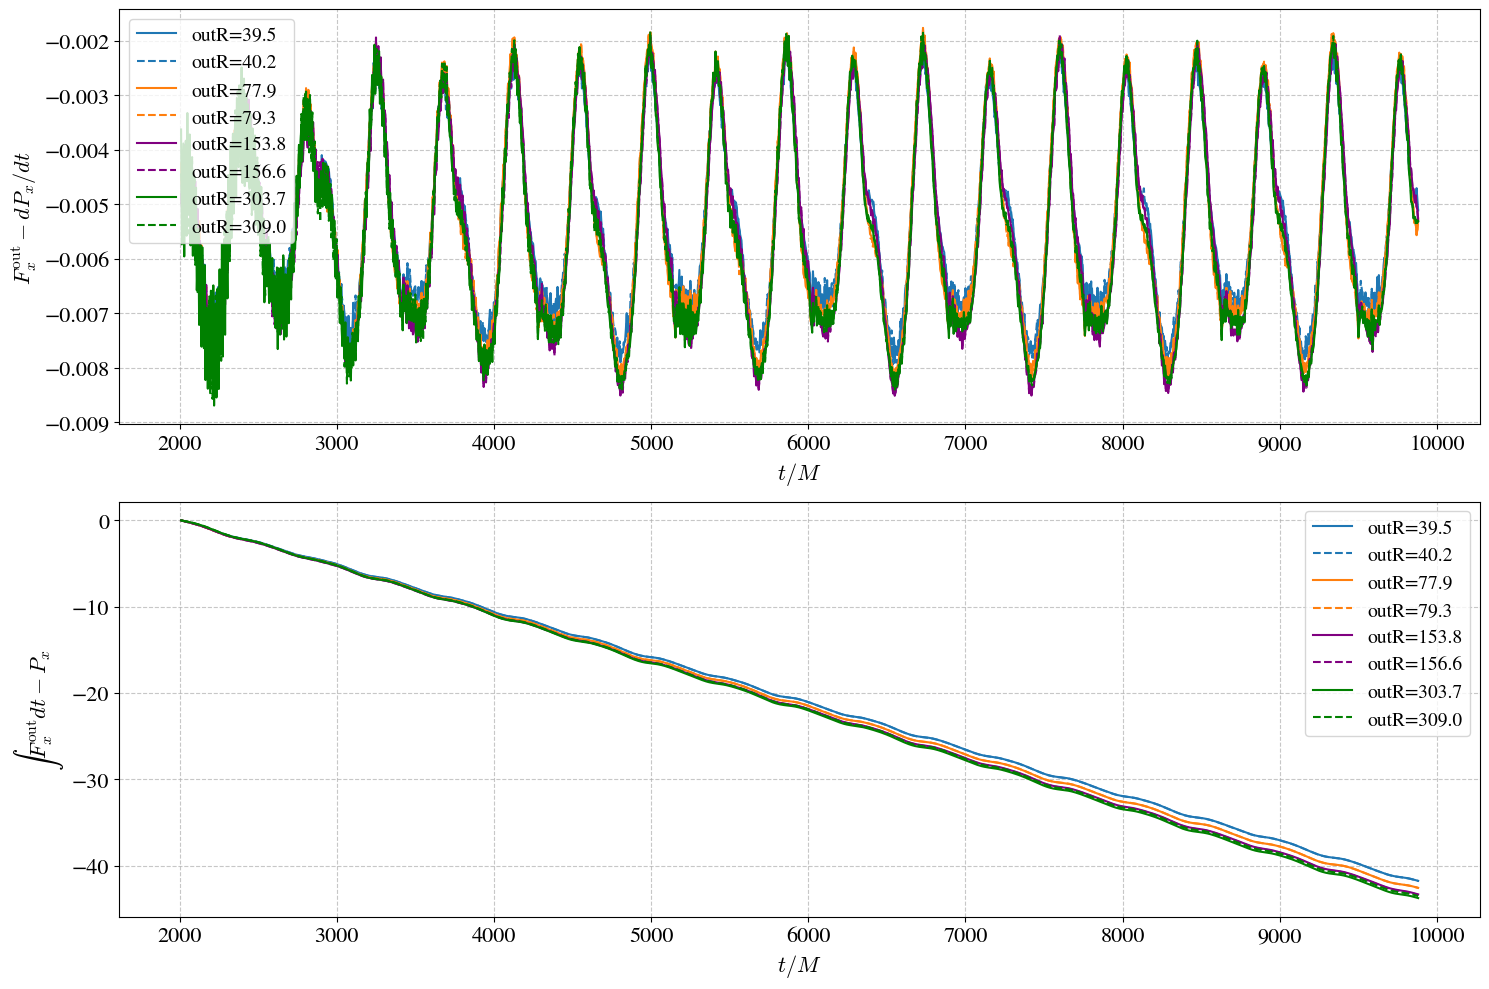

In [6]:
# now take the difference Fout - dPx/dt, we should see it converges well with respect to outR, since the drag is not significant at large radii, and accretion is unchanged

simname = '250528_BBH_r70_moreplots_restart'
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

for i, outR in enumerate(outRs):
    print(outR)
    # Load momentum data
    results = np.load(plotdir+f"{simname}_2d_integrals_outR{outR:.1f}_excise{excise_factor}_parallel.npy")
    results = results[1:]
    
    # Load surface flux data
    results_sur = np.load(plotdir+f"{simname}_2d_integrals_surface_outR{outR:.1f}_excise{excise_factor}_parallel.npy")
    results_sur = results_sur[1:]
    
    # Extract momentum and derivative
    momentum, derivative = extract_momentum_and_derivative(results)
    
    # Determine color index and line style
    color_idx = i // 2
    style_idx = i % 2
    
    # Upper panel: Plot F_out - dPx/dt
    difference = -results_sur[:,1] - derivative
    ax1.plot(results[:,0], difference, 
             color=colors[color_idx], linestyle=line_styles[style_idx],
             label=f'outR={outR:.1f}')
    
    # Lower panel: Plot integrated F_out - Px
    # Calculate integrated F_out
    dt_sur = results_sur[1,0] - results_sur[0,0]
    cumulative_sum_sur = np.cumsum(results_sur[:,1])*dt_sur - results_sur[0,1]*dt_sur
    
    # Calculate difference between integrated flux and momentum
    integrated_difference = -cumulative_sum_sur - momentum
    
    ax2.plot(results[:,0], integrated_difference, 
             color=colors[color_idx], linestyle=line_styles[style_idx],
             label=f'outR={outR:.1f}')

# Configure upper subplot
ax1.set_xlabel('$t/M$', fontsize=fontsize)
ax1.set_ylabel('$F^{\\mathrm{out}}_x - dP_x/dt$', fontsize=fontsize)
ax1.tick_params(labelsize=fontsize)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(fontsize=fontsize-2)

# Configure lower subplot
ax2.set_xlabel('$t/M$', fontsize=fontsize)
ax2.set_ylabel('$\\int F^{\\mathrm{out}}_x dt - P_x$', fontsize=fontsize)
ax2.tick_params(labelsize=fontsize)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(fontsize=fontsize-2)

plt.tight_layout()
plt.show()
